# Import Libraries

In [100]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from pickle import dump
from pickle import load

# Reading Data Set using Pandas

In [3]:
credit = pd.read_csv(r'C:\Users\Qing\Downloads\default of credit card clients.csv', header =1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Pre-processing

In [128]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [4]:
credit=credit.drop('ID', axis=1)

In [5]:
# change variable types
credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')
credit['PAY_0'] = credit['PAY_0'].astype('category')
credit['PAY_2'] = credit['PAY_2'].astype('category')
credit['PAY_3'] = credit['PAY_3'].astype('category')
credit['PAY_4'] = credit['PAY_4'].astype('category')
credit['PAY_5'] = credit['PAY_5'].astype('category')
credit['PAY_6'] = credit['PAY_6'].astype('category')
credit['default payment next month'] = credit['default payment next month'].astype('category')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
PAY_0                         30000 non-null category
PAY_2                         30000 non-null category
PAY_3                         30000 non-null category
PAY_4                         30000 non-null category
PAY_5                         30000 non-null category
PAY_6                         30000 non-null category
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int

In [6]:
XC=credit.loc[:,['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
XC.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
scaler = StandardScaler()
rescaledX = scaler.fit_transform(XC)
print(rescaledX[0:5,:])
rescaledX= pd.DataFrame(rescaledX)
rescaledX.columns = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
rescaledX.head()

[[-1.13672015 -1.24601985 -0.64250107 -0.64739923 -0.66799331 -0.67249727
  -0.66305853 -0.65272422 -0.34194162 -0.22708564 -0.29680127 -0.30806256
  -0.31413612 -0.29338206]
 [-0.3659805  -1.02904717 -0.65921875 -0.66674657 -0.63925429 -0.62163594
  -0.60622927 -0.59796638 -0.34194162 -0.21358766 -0.24000461 -0.24422965
  -0.31413612 -0.18087821]
 [-0.59720239 -0.16115646 -0.29855966 -0.49389911 -0.48240819 -0.44973025
  -0.41718767 -0.39162956 -0.25029158 -0.19188673 -0.24000461 -0.24422965
  -0.24868274 -0.01212243]
 [-0.90549825  0.16430256 -0.05749103 -0.01329269  0.03284648 -0.23237268
  -0.18672897 -0.15657889 -0.22119058 -0.16936116 -0.22864528 -0.23784635
  -0.24416646 -0.23713013]
 [-0.90549825  2.33402934 -0.57861809 -0.61131792 -0.16118875 -0.3469972
  -0.34813724 -0.33148158 -0.22119058  1.33503416  0.27116536  0.26643369
  -0.26903874 -0.255187  ]]


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [8]:
credit = pd.get_dummies(credit,drop_first=True)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 83 columns):
LIMIT_BAL                       30000 non-null int64
AGE                             30000 non-null int64
BILL_AMT1                       30000 non-null int64
BILL_AMT2                       30000 non-null int64
BILL_AMT3                       30000 non-null int64
BILL_AMT4                       30000 non-null int64
BILL_AMT5                       30000 non-null int64
BILL_AMT6                       30000 non-null int64
PAY_AMT1                        30000 non-null int64
PAY_AMT2                        30000 non-null int64
PAY_AMT3                        30000 non-null int64
PAY_AMT4                        30000 non-null int64
PAY_AMT5                        30000 non-null int64
PAY_AMT6                        30000 non-null int64
SEX_2                           30000 non-null uint8
EDUCATION_1                     30000 non-null uint8
EDUCATION_2                     30000 non-n

In [9]:
credit1=credit.drop(['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1,)
credit1.head()

,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default payment next month_1
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [10]:
credit_df = pd.concat([rescaledX, credit1], axis=1)
credit_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default payment next month_1
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,...,0,0,0,0,0,0,0,0,0,1
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,...,0,0,1,0,0,0,0,0,0,1
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,...,0,1,0,0,0,0,0,0,0,0
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,...,0,1,0,0,0,0,0,0,0,0
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,...,0,1,0,0,0,0,0,0,0,0


In [82]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 83 columns):
LIMIT_BAL                       30000 non-null float64
AGE                             30000 non-null float64
BILL_AMT1                       30000 non-null float64
BILL_AMT2                       30000 non-null float64
BILL_AMT3                       30000 non-null float64
BILL_AMT4                       30000 non-null float64
BILL_AMT5                       30000 non-null float64
BILL_AMT6                       30000 non-null float64
PAY_AMT1                        30000 non-null float64
PAY_AMT2                        30000 non-null float64
PAY_AMT3                        30000 non-null float64
PAY_AMT4                        30000 non-null float64
PAY_AMT5                        30000 non-null float64
PAY_AMT6                        30000 non-null float64
SEX_2                           30000 non-null uint8
EDUCATION_1                     30000 non-null uint8
EDUCATION_2    

In [11]:
Y = credit_df['default payment next month_1'].values
X=credit_df.drop('default payment next month_1', axis=1).values

# Feature Engineering 

In [106]:
model = LogisticRegression()
rfe = RFE(model)
rfem = rfe.fit(X, Y)
print("Num Features: %d" % rfem.n_features_)
print("Selected Features: %s" % rfem.support_)
print("Feature Ranking: %s" % rfem.ranking_)

Num Features: 41
Selected Features: [ True False False False False False False False False False False False
 False False False False False False  True  True False  True  True  True
  True False  True  True  True  True  True  True  True  True  True False
  True False False  True  True  True  True  True False False False  True
  True False  True  True  True False False False  True  True False  True
  True  True False  True False False  True False  True False False  True
 False  True  True False  True False False  True False  True]
Feature Ranking: [ 1 34 16 15 11 40 38 27  9  7 36 35 33 29 12  3  2  4  1  1 37  1  1  1
  1 10  1  1  1  1  1  1  1  1  1 24  1 25 23  1  1  1  1  1 39 32 28  1
  1 14  1  1  1 18 20 31  1  1  8  1  1  1 17  1 13 42  1 26  1 19  5  1
  6  1  1 30  1 41 22  1 21  1]


In [12]:
Xr=credit_df.iloc[:,[0,18,19,21,22,23,24,26,27,28,29,30,31,32,33,34,36,39,40,41,42,43,47,48,50,51,52,56,57,59,60,61,63,66,68,71,73,74,76,79,81]]
Xr.head()

,LIMIT_BAL,EDUCATION_4,EDUCATION_5,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-1,PAY_0_1,PAY_0_2,PAY_0_3,...,PAY_4_6,PAY_4_8,PAY_5_2,PAY_5_4,PAY_5_7,PAY_6_-1,PAY_6_0,PAY_6_3,PAY_6_6,PAY_6_8
0,-1.136720,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.365981,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.597202,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.905498,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.905498,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
Xr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 41 columns):
LIMIT_BAL      30000 non-null float64
EDUCATION_4    30000 non-null uint8
EDUCATION_5    30000 non-null uint8
MARRIAGE_1     30000 non-null uint8
MARRIAGE_2     30000 non-null uint8
MARRIAGE_3     30000 non-null uint8
PAY_0_-1       30000 non-null uint8
PAY_0_1        30000 non-null uint8
PAY_0_2        30000 non-null uint8
PAY_0_3        30000 non-null uint8
PAY_0_4        30000 non-null uint8
PAY_0_5        30000 non-null uint8
PAY_0_6        30000 non-null uint8
PAY_0_7        30000 non-null uint8
PAY_0_8        30000 non-null uint8
PAY_2_-1       30000 non-null uint8
PAY_2_1        30000 non-null uint8
PAY_2_4        30000 non-null uint8
PAY_2_5        30000 non-null uint8
PAY_2_6        30000 non-null uint8
PAY_2_7        30000 non-null uint8
PAY_2_8        30000 non-null uint8
PAY_3_2        30000 non-null uint8
PAY_3_3        30000 non-null uint8
PAY_3_5        30000 non-

# Classification 

In [57]:
X1=Xr.values
Y = credit_df['default payment next month_1'].values

In [71]:
# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X1,Y,test_size=0.3,random_state=7)

LR: 0.820095 (0.011250)
KNN: 0.795952 (0.010843)
CART: 0.801238 (0.010496)
NB: 0.794476 (0.012217)
SVM: 0.818286 (0.011138)


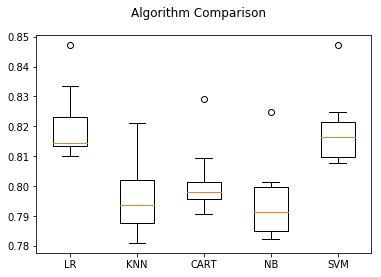

In [73]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Improve Performance with Ensembles

In [74]:
# Stochastic Gradient Boosting Classification
num_trees = 100
kfold = KFold(n_splits=10, random_state=7)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.8205238095238094


In [75]:
# Random Forest Classification
num_trees = 100
max_features = 10
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.8011904761904762


In [76]:
# Extra Trees Classification
num_trees = 100
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7995238095238094


In [77]:
# Bagged Decision Trees for Classification
kfold = KFold(n_splits=10, random_state=7)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.8007619047619048


# Model Tuning 

In [78]:
# Stochastic Gradient Boosting Classification tuning
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]),learning_rate=np.array([0.001, 0.01, 0.1]))
model = GradientBoostingClassifier(random_state=7)
kfold = KFold(n_splits=10, random_state=7)
gbm_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
gbmresult = gbm_cv.fit(X_train, y_train)
print("Best: %f using %s" % (gbmresult.best_score_, gbmresult.best_params_))
means = gbmresult.cv_results_['mean_test_score']
stds = gbmresult.cv_results_['std_test_score']
params = gbmresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820524 using {'learning_rate': 0.1, 'n_estimators': 100}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 150}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 200}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 250}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 300}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 350}
0.778333 (0.012212) with: {'learning_rate': 0.001, 'n_estimators': 400}
0.778333 (0.012212) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.817000 (0.010844) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.818143 (0.010531) with: {'learning_rate': 0.01, 'n_estimators': 150}
0.818238 (0.010550) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.818238 (0.010622) with: {'learning_rate': 0.01, 'n_estimators': 250}
0.8192

[0.19626449 0.01144041 0.0221281  0.02471166 0.0053586  0.00858292
 0.03046801 0.05885364 0.14359501 0.04523934 0.03998935 0.01102297
 0.00843566 0.00554135 0.00184164 0.03284021 0.00406668 0.01025828
 0.01166551 0.01174608 0.01681727 0.         0.04068634 0.01032431
 0.00435253 0.01115467 0.         0.         0.02832306 0.01953766
 0.00336781 0.00415862 0.         0.02299321 0.00778268 0.02121292
 0.04274981 0.04868363 0.02045471 0.00564314 0.0077077 ]


Text(0,0.5,'Feature Importance Score')

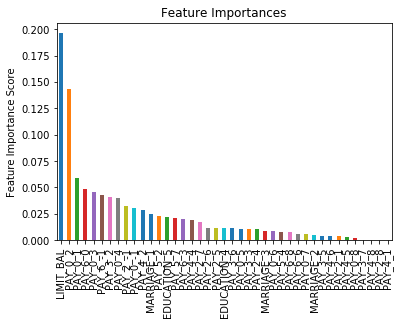

In [80]:
# feature importantce
print(gbm_cv.best_estimator_.feature_importances_)
feat_imp = pd.Series(gbm_cv.best_estimator_.feature_importances_,Xr.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [90]:
# LogisticRegression Algorithm tuning
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}
logreg_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
logresult=logreg_cv.fit(X_train, y_train)
print("Best: %f using %s" % (logresult.best_score_, logresult.best_params_))
means = logresult.cv_results_['mean_test_score']
stds = logresult.cv_results_['std_test_score']
params = logresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.821000 using {'C': 1389495.494373136, 'penalty': 'l2'}
0.778333 (0.012212) with: {'C': 1e-05, 'penalty': 'l1'}
0.778333 (0.012212) with: {'C': 1e-05, 'penalty': 'l2'}
0.778333 (0.012212) with: {'C': 8.483428982440725e-05, 'penalty': 'l1'}
0.778333 (0.012212) with: {'C': 8.483428982440725e-05, 'penalty': 'l2'}
0.778333 (0.012212) with: {'C': 0.0007196856730011522, 'penalty': 'l1'}
0.788857 (0.011709) with: {'C': 0.0007196856730011522, 'penalty': 'l2'}
0.806381 (0.011345) with: {'C': 0.006105402296585327, 'penalty': 'l1'}
0.807095 (0.010640) with: {'C': 0.006105402296585327, 'penalty': 'l2'}
0.817429 (0.010978) with: {'C': 0.05179474679231213, 'penalty': 'l1'}
0.817571 (0.011554) with: {'C': 0.05179474679231213, 'penalty': 'l2'}
0.819667 (0.011409) with: {'C': 0.4393970560760795, 'penalty': 'l1'}
0.820048 (0.011437) with: {'C': 0.4393970560760795, 'penalty': 'l2'}
0.820810 (0.011115) with: {'C': 3.727593720314938, 'penalty': 'l1'}
0.820857 (0.011082) with: {'C': 3.727593720314938

In [92]:
# DecisionTreeClassifier Algorithm tuning
# Setup the parameters and distributions to sample from: param_dist
kfold = KFold(n_splits=10, random_state=7)
param_dist = {"max_depth": [3,5,7],
              "max_features": [3,5,7,9],
              "min_samples_leaf": [30,50,100],
              "criterion": ["gini", "entropy"]}
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv =RandomizedSearchCV(tree, param_dist, cv=kfold)
# Fit it to the data
treeresult=tree_cv.fit(X_train, y_train)
print("Best: %f using %s" % (treeresult.best_score_, treeresult.best_params_))
means = treeresult.cv_results_['mean_test_score']
stds = treeresult.cv_results_['std_test_score']
params = treeresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.807810 using {'min_samples_leaf': 30, 'max_features': 9, 'max_depth': 7, 'criterion': 'entropy'}
0.797190 (0.014602) with: {'min_samples_leaf': 100, 'max_features': 7, 'max_depth': 3, 'criterion': 'gini'}
0.801810 (0.015929) with: {'min_samples_leaf': 30, 'max_features': 7, 'max_depth': 3, 'criterion': 'gini'}
0.790762 (0.013915) with: {'min_samples_leaf': 30, 'max_features': 3, 'max_depth': 5, 'criterion': 'gini'}
0.790381 (0.013609) with: {'min_samples_leaf': 100, 'max_features': 3, 'max_depth': 3, 'criterion': 'gini'}
0.806429 (0.010978) with: {'min_samples_leaf': 30, 'max_features': 7, 'max_depth': 7, 'criterion': 'entropy'}
0.807810 (0.015736) with: {'min_samples_leaf': 30, 'max_features': 9, 'max_depth': 7, 'criterion': 'entropy'}
0.802762 (0.013430) with: {'min_samples_leaf': 30, 'max_features': 5, 'max_depth': 5, 'criterion': 'entropy'}
0.803333 (0.014340) with: {'min_samples_leaf': 30, 'max_features': 5, 'max_depth': 7, 'criterion': 'entropy'}
0.797524 (0.019202) with:

In [93]:
# KNN Algorithm tuning
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsClassifier()
kfold = KFold(n_splits=10, random_state=7)
knn_cv= GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
knnresult = knn_cv.fit(X_train, y_train)
print("Best: %f using %s" % (knnresult.best_score_, knnresult.best_params_))
means = knnresult.cv_results_['mean_test_score']
stds = knnresult.cv_results_['std_test_score']
params = knnresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.814524 using {'n_neighbors': 15}
0.728762 (0.016361) with: {'n_neighbors': 1}
0.782190 (0.010909) with: {'n_neighbors': 3}
0.795952 (0.010843) with: {'n_neighbors': 5}
0.801667 (0.009776) with: {'n_neighbors': 7}
0.810048 (0.010451) with: {'n_neighbors': 9}
0.811762 (0.009557) with: {'n_neighbors': 11}
0.813238 (0.010009) with: {'n_neighbors': 13}
0.814524 (0.009183) with: {'n_neighbors': 15}
0.814095 (0.009205) with: {'n_neighbors': 17}
0.813143 (0.010142) with: {'n_neighbors': 19}
0.814190 (0.009464) with: {'n_neighbors': 21}


In [103]:
# SVM Algorithm tuning
kfold = KFold(n_splits=10, random_state=7)
# Specify the hyperparameter space
param_grid = {'C':[1, 10, 100],
              'gamma':[0.1, 0.01]}
model =SVC()
kfold = KFold(n_splits=10, random_state=7)
svc_cv= GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
svcresult = svc_cv.fit(X_train, y_train)
print("Best: %f using %s" % (svcresult.best_score_, svcresult.best_params_))
means = svcresult.cv_results_['mean_test_score']
stds = svcresult.cv_results_['std_test_score']
params = svcresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.820952 using {'C': 10, 'gamma': 0.1}
0.818810 (0.011769) with: {'C': 1, 'gamma': 0.1}
0.818238 (0.011303) with: {'C': 1, 'gamma': 0.01}
0.820952 (0.011523) with: {'C': 10, 'gamma': 0.1}
0.819619 (0.011795) with: {'C': 10, 'gamma': 0.01}
0.817810 (0.010295) with: {'C': 100, 'gamma': 0.1}
0.819000 (0.011646) with: {'C': 100, 'gamma': 0.01}


In [97]:
# Random Forest Classification tuning
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]),max_features=np.array([3,5,7,9,10]))
model = RandomForestClassifier()
kfold = KFold(n_splits=10, random_state=7)
rf_cv = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
rfresult = rf_cv.fit(X_train, y_train)
print("Best: %f using %s" % (rfresult.best_score_, rfresult.best_params_))
means = rfresult.cv_results_['mean_test_score']
stds = rfresult.cv_results_['std_test_score']
params = rfresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.803524 using {'max_features': 7, 'n_estimators': 200}
0.800952 (0.008711) with: {'max_features': 3, 'n_estimators': 50}
0.801619 (0.008902) with: {'max_features': 3, 'n_estimators': 100}
0.800571 (0.009504) with: {'max_features': 3, 'n_estimators': 150}
0.801667 (0.009847) with: {'max_features': 3, 'n_estimators': 200}
0.802095 (0.009746) with: {'max_features': 3, 'n_estimators': 250}
0.802667 (0.009964) with: {'max_features': 3, 'n_estimators': 300}
0.803048 (0.009720) with: {'max_features': 3, 'n_estimators': 350}
0.801524 (0.009067) with: {'max_features': 3, 'n_estimators': 400}
0.801286 (0.010023) with: {'max_features': 5, 'n_estimators': 50}
0.800810 (0.010090) with: {'max_features': 5, 'n_estimators': 100}
0.800905 (0.008298) with: {'max_features': 5, 'n_estimators': 150}
0.802000 (0.009872) with: {'max_features': 5, 'n_estimators': 200}
0.802286 (0.008762) with: {'max_features': 5, 'n_estimators': 250}
0.801762 (0.009253) with: {'max_features': 5, 'n_estimators': 300}
0.

# Model Evaluation

In [87]:
# Predict the labels of the test set: y_pred using Gradient Boosting Classification
y_pred = gbm_cv.predict(X_test)
print(y_pred)
# Compute and print metrics
print("Accuracy: {}".format(gbm_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(gbm_cv.best_params_))

[0 0 0 ... 1 0 0]
Accuracy: 0.8201111111111111
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7019
          1       0.67      0.35      0.46      1981

avg / total       0.80      0.82      0.80      9000

Tuned Model Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [91]:
# Predict the labels of the test set: y_pred using LogisticRegression
y_pred2 = logreg_cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(logreg_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred2))
print("Tuned Model Parameters: {}".format(logreg_cv.best_params_))

Accuracy: 0.8186666666666667
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7019
          1       0.67      0.35      0.46      1981

avg / total       0.80      0.82      0.80      9000

Tuned Model Parameters: {'C': 1389495.494373136, 'penalty': 'l2'}


In [94]:
# Predict the labels of the test set: y_pred using KNN
y_pred3 = knn_cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(knn_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred3))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))

Accuracy: 0.8163333333333334
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7019
          1       0.65      0.35      0.46      1981

avg / total       0.80      0.82      0.79      9000

Tuned Model Parameters: {'n_neighbors': 15}


In [104]:
# Predict the labels of the test set: y_pred using SVM
y_pred4 = svc_cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(svc_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred4))
print("Tuned Model Parameters: {}".format(svc_cv.best_params_))

Accuracy: 0.8188888888888889
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7019
          1       0.68      0.34      0.45      1981

avg / total       0.80      0.82      0.80      9000

Tuned Model Parameters: {'C': 10, 'gamma': 0.1}


In [98]:
# Predict the labels of the test set: y_pred using Random Forest
y_pred5 = rf_cv.predict(X_test)
# Compute and print metrics
print("Accuracy: {}".format(rf_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred5))
print("Tuned Model Parameters: {}".format(rf_cv.best_params_))

Accuracy: 0.7983333333333333
             precision    recall  f1-score   support

          0       0.84      0.92      0.88      7019
          1       0.57      0.36      0.44      1981

avg / total       0.78      0.80      0.78      9000

Tuned Model Parameters: {'max_features': 7, 'n_estimators': 200}


# Finalize  Model with pickle

In [102]:
# save the model to disk
filename = 'finalized_model.sav'
dump(gbm_cv, open(filename, 'wb'))

# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8201111111111111
